# Research Question

## How to reduce readmission rate?
The CMS penalizes hospitals for excessive readmissions, but many are not adequately prepared. The number of hospitals that receive penalties has increased, despite most hospitals believing they can reduce readmissions. However, less than 20% of hospitals use specific technology, indicating that they may be more likely to receive penalties. The goal of this task is to prepare data for analysis and gain insights into the causes of patient readmissions. The study aims to predict if a patient is likely to be readmitted based on their previous admission and associated data. This information can assist hospital staff, including admissions employees, nurses, and physicians, in providing proper treatment and reducing treatment costs. Healthcare professionals can ensure appropriate treatment and reduce the chances of a patient returning for the same issue by identifying the cause.

## Variables
The dataset under analysis comprises different types of data such as location details (city, state, and zip code), the population of the city, and the kind of area. Demographic information includes age, gender, marital status, number of children, employment status, and income. Additionally, the dataset covers various health conditions like stroke, diabetes, anxiety, asthma, and arthritis. All of the data types can be either numeric or text based. The variables listed as "object" are strings, while those listed as "float64" or "int64" are numeric. The output below shows information about the data, including the index data type and columns, generated by a method from a Python library called pandas.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
# Custom pallette
cyber_punk_colors = [
    "#01012B",  # Dark Navy
    "#005678",  # Deep Teal
    "#05D9E8",  # Electric Blue
    "#D1f7FF",  # Pale Cyan
    "#FF2A6D",  # Coral Pink
    "#f72585",  # Electric Pink
    "#b5179e",  # Vibrant Purple
    "#7209b7",  # Deep Indigo
    "#560bad",  # Dark Violet
    "#480ca8",  # Royal Purple
    "#3A0CA3",  # Deep Purple
    "#3F37C9",  # Rich Blue
    "#4361ee",  # Blueberry
    "#4895ef",  # Dodger Blue
    "#4CC9F0",  # Sky Blue
    "#80ffdb",  # Mint Green
    "#20c997",  # Cyber Green
    "#17c3b2",  # Teal Green
    "#ea00d9"   # Magenta
]

cyber_punk_colors_r = cyber_punk_colors[::-1]


# Settings
%matplotlib inline
sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)


import mplcyberpunk
plt.style.use("cyberpunk")

In [2]:
# Loading Data
df = pd.read_csv('medical_raw_data.csv')

In [3]:
# Inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

# Data Cleaning

## Data Inspection
To clean data properly, it's important to fully understand the information. This means knowing what type of data it is, how it's organized, and any problems that might be there. By understanding the data well, cleaning it will be easier and more accurate, leading to better results.

In [4]:
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


## Data Filtering
To analyze data effectively, it's important to only use relevant information and remove any duplicates or unnecessary features. This can help you focus on your main goal and make your analysis more efficient. It can also improve performance by reducing the amount of data that needs to be processed.

In [5]:
#  Checking for duplicate values
df.duplicated().value_counts()

False    10000
dtype: int64

The data contains various columns that serve only for searching and identifying specific cases in a corporate environment. These include Unnamed: 0, UID, CaseOrder, Interaction, and Customer_id. Meanwhile, attributes such as Zip, Lng, Lat, Population, and Timezone, which are location-related, are not essential in comprehending patient readmission to the hospital.

*Note: For this assignment, I didn't drop the irrelevant columns because I was required to perform PCA on all continuous data.*

In [6]:
# df.drop(columns=['Unnamed: 0', 'UID', 'CaseOrder', 'Customer_id', 'Interaction',
#         'Zip', 'Lat', 'Lng', 'Population', 'Timezone'],inplace = True,errors='ignore')

## Standardize
To avoid mistakes in grouping or categorizing data, it's important to keep the text consistent. When cleaning data, numerical values may need to be converted, and dates stored as text may need to be changed for computation. Using different formats and sources of data can cause errors and confusion, making it difficult for machine learning models to analyze information. 

In [7]:
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


Using descriptive names improves the readability of the data.The columns labeled Item1 through Item8 will be renamed to correspond with the data dictionary. 
- Item1 -> Timely_Admission
- Item2 -> Timely_Treatment
- Item3 -> Timely_Visit
- Item4 -> Reliability
- Item5 -> Options
- Item6 -> Treat_Hrs
- Item7 -> Courteous_Staff
- Item8 -> Active_Listening.

In [8]:
df.rename(columns={'Item1': 'Timely_Admission', 'Item2': 'Timely_Treatment', 'Item3': 'Timely_Visit',
                   'Item4': 'Reliability', 'Item5': 'Options', 'Item6': 'Treat_Hrs',
                   'Item7': 'Courteous_Staff', 'Item8': 'Active_Listening'}, inplace=True)

A good way to find structural errors is to highlight unique values.

In [9]:
# Get the unique values for each column.
unique_values = [df[column].unique() for column in df]

# Return a dataframe of all unique values.
df_unique=pd.DataFrame({'column': df.columns, 'value': unique_values})

I made some updates to the text columns by changing the "yes" and "no" values to 1 and 0, respectively. This was done to avoid confusion and ensure consistency with other attributes. I also converted all text columns to lowercase for consistency and renamed the survey response columns to match the survey question, which makes it easier to analyze a patient's experience. Additionally, I converted Age, Children, TotalCharge, Initial_days, and Income into their appropriate numerical format to align with real-world conventions.

In [10]:
# Round and convert to integer.
df['Age'] = df['Age'].astype('Int64', errors='ignore')
df['Children'] = df['Children'].astype('Int64', errors='ignore')
df['Overweight'] = df['Overweight'].astype('Int64', errors='ignore')
df['Anxiety'] = df['Anxiety'].astype('Int64', errors='ignore')


# Round to fit currency format
df['TotalCharge']= df['TotalCharge'].round(2)
df['Additional_charges']= df['Additional_charges'].round(2)


# Convert all strings to lowercase
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
# Replace all yes/no responses with 1 and 0 respectively 
df.replace({'yes': int(1), 'no': int(0)},inplace=True)
# Convert to integer.
df['Soft_drink'] = df['Soft_drink'].astype('Int64', errors='ignore')

## Handling Missing Values
When analyzing data, it's essential to identify incomplete information. Failing to do so can result in inaccurate and unreliable conclusions, as machine learning algorithms are not equipped to handle this issue. To ensure accurate and valid results, it's crucial to address missing data systematically and thoroughly..

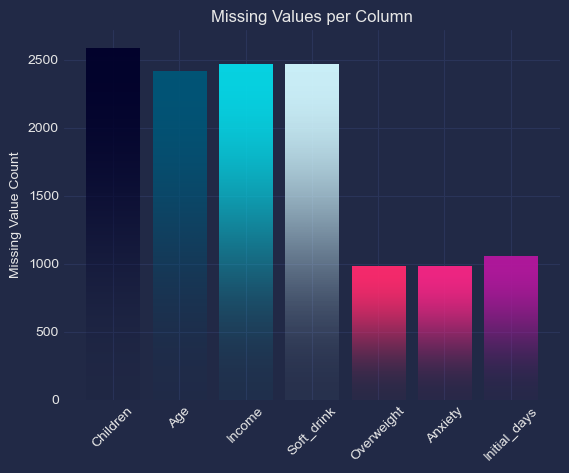

In [11]:
# Filter columns with missing values
columns_with_missing = df.columns[df.isna().any()].tolist()
df_missing = df[columns_with_missing]

# Count missing values in each column
missing_counts = df_missing.isna().sum()
# Plot histogram
bars = plt.bar(missing_counts.index, missing_counts.values,color = cyber_punk_colors)
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_bar_gradient(bars=bars)
plt.ylabel('Missing Value Count')
plt.title('Missing Values per Column')
plt.xticks(rotation=45)
plt.show()


In [12]:
missing_counts

Children        2588
Age             2414
Income          2464
Soft_drink      2467
Overweight       982
Anxiety          984
Initial_days    1056
dtype: int64

Some variables, such as Children, Age, Income, Soft_drink, Overweight, Anxiety, and Initial_days, had missing data. To address this, I removed the few rows with missing data for the Overweight column, as it would not affect the analysis. 

### Overweight

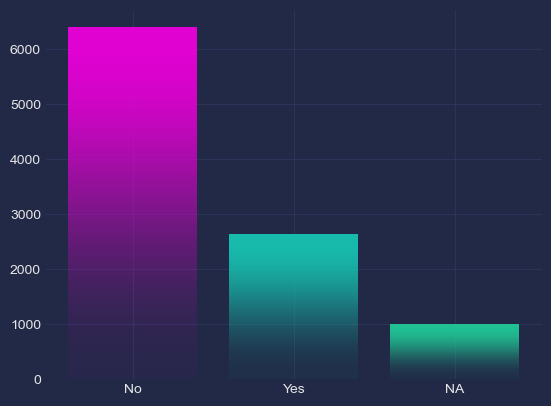

In [13]:
ow = df['Overweight'].astype('str').value_counts()
bars = plt.bar(ow.index, ow.values,color= cyber_punk_colors_r)

bin_names = ['No', 'Yes','NA']
plt.xticks(range(len(bin_names)), bin_names)
mplcyberpunk.add_bar_gradient(bars=bars)

In [14]:
df.dropna(subset=['Overweight'], inplace=True)

For the Soft_drink and Anxiety columns, instead of removing the irrelevant rows, I filled in the missing data with 0 to keep the rows with missing data. 

### Soft Drink

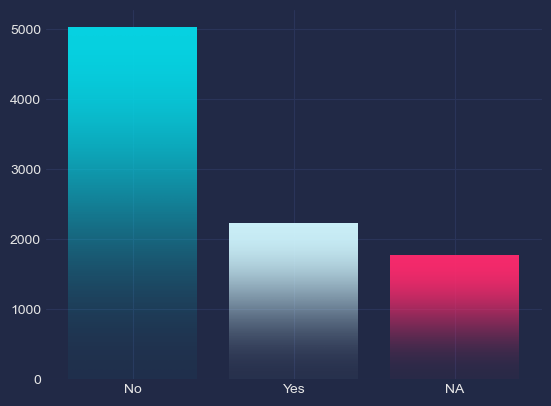

In [15]:
sd = df['Soft_drink'].astype('str').value_counts()
bars = plt.bar(sd.index, sd.values,color= cyber_punk_colors[2:6])

bin_names = ['No', 'Yes','NA']
plt.xticks(range(len(bin_names)), bin_names)
mplcyberpunk.add_bar_gradient(bars=bars)

In [16]:
df['Soft_drink'].fillna(0,inplace=True)

### Anxiety

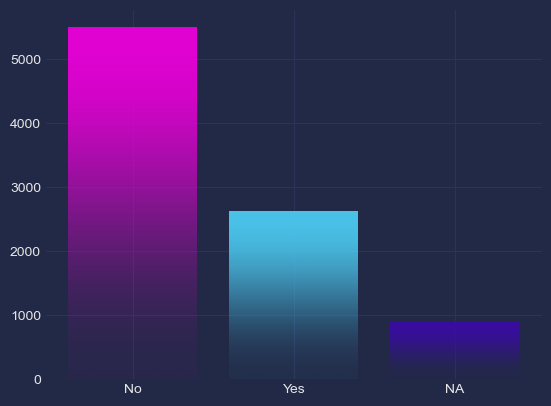

In [17]:
anx = df['Anxiety'].astype('str').value_counts()
bars = plt.bar(anx.index, anx.values,color=cyber_punk_colors_r[::4])
bin_names = ['No', 'Yes','NA']
plt.xticks(range(len(bin_names)), bin_names)
mplcyberpunk.add_bar_gradient(bars=bars)


In [18]:
df['Anxiety'].fillna(0,inplace=True)

I used interpolation, to fill in the remaining missing data for Initial Days and Income. 

### Initial Days

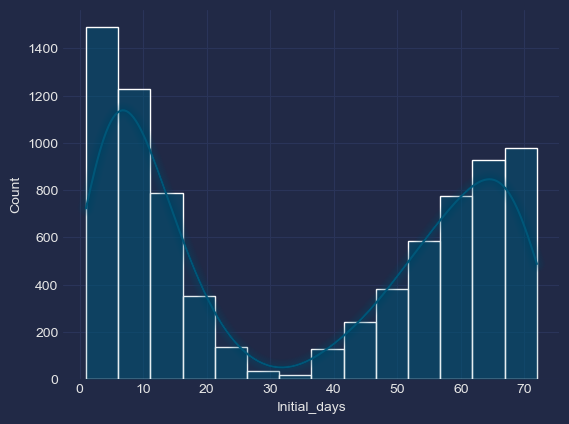

In [19]:
sns.histplot(df['Initial_days'],color=cyber_punk_colors[1],kde=True);
mplcyberpunk.add_glow_effects()

In [20]:
df['Initial_days'].interpolate(method='linear',inplace=True)


### Income


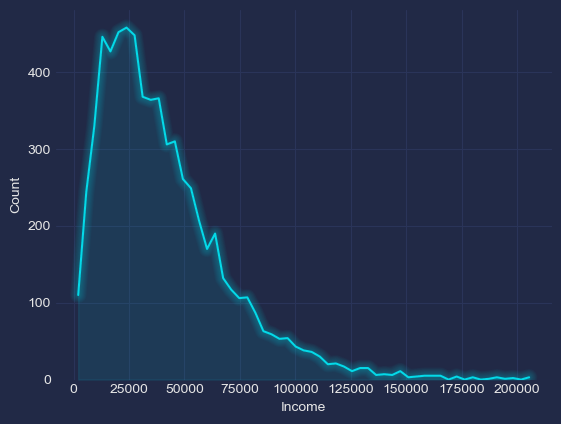

In [21]:
sns.histplot(df['Income'],element='poly',color=cyber_punk_colors[2],fill=False);
mplcyberpunk.add_glow_effects()

In [22]:
df['Income'].interpolate(method='nearest', inplace=True);

I used the mean to fill in the nulls for Age and the median for Children, as the distribution was highly skewed.

### Age


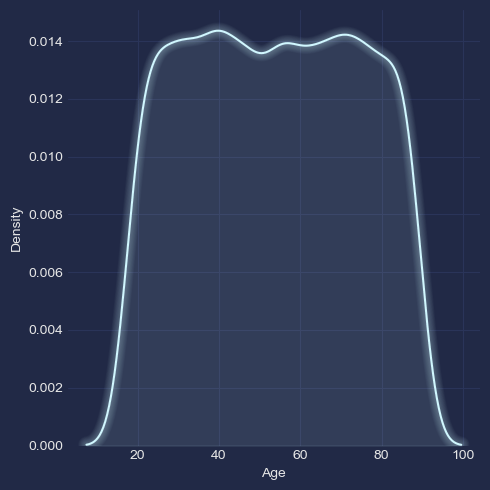

In [23]:
sns.displot(df['Age'].dropna(),kind='kde',color=cyber_punk_colors[3]);
mplcyberpunk.add_glow_effects()

In [24]:
# Filled in with the mean.
df["Age"].fillna(((df["Age"].mean()).round()), inplace=True)
df['Age'] = df['Age'].astype('int64', errors='ignore')

### Children

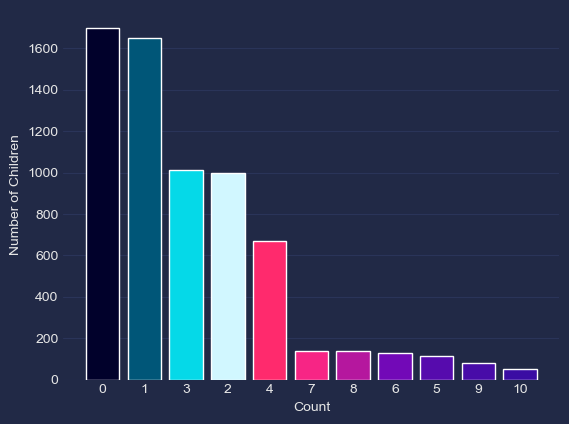

In [25]:
ch = df['Children'].dropna().astype('str').value_counts()
sns.barplot(x=ch.index, y=ch.values,palette=cyber_punk_colors,estimator='median',saturation=1);
plt.ylabel('Number of Children');
plt.xlabel('Count');
mplcyberpunk.add_glow_effects()

In [26]:
# Fill in nulls for Children column with the median
df['Children'].fillna(df['Children'].median(),inplace=True)
df['Children'] = df['Children'].astype('int64', errors='ignore')

Let's see if we handled all the null values.

In [27]:
df.columns.isna().any()

False

## Handling Outliers

Access to reliable and accurate data is crucial to making informed decisions. However, outliers can create problems during data analysis by skewing results and introducing bias. To maintain data integrity, it is important to conduct a thorough review and identify any outliers present. Removing these outliers will ensure that analysis results are not distorted, and the information obtained is accurate and unbiased.

I noticed some unusual data in the categories of children, income, VitD_levels, and TotalCharge. To fix this, I set a maximum of six children and an income limit of $120,000.00.

### Income

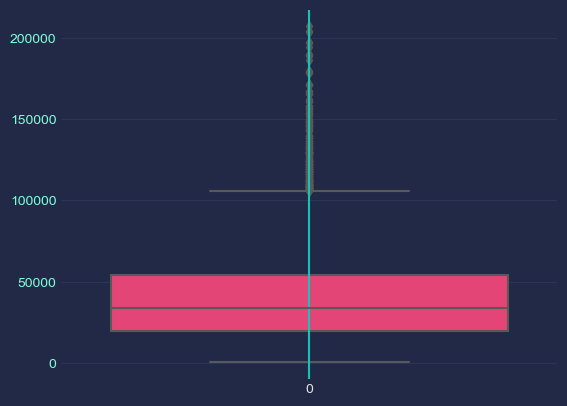

In [28]:
# sns.boxplot(df['Income'],color='#00CCB4');
sns.boxplot(df['Income'],color=cyber_punk_colors[4]);
plt.yticks(color=cyber_punk_colors[15]);
plt.axvline(color=cyber_punk_colors[17]);

In [29]:
inc = pd.DataFrame(df['Income'].describe())
inc

,Income
count,9018.000000
mean,40585.243454
std,28605.695839
min,300.790000
25%,19501.467500
50%,34025.155000
75%,54007.272500
max,207249.130000


In [30]:
# Cap at 120k
df.loc[df['Income'] > 120000,'Income'] = 120000

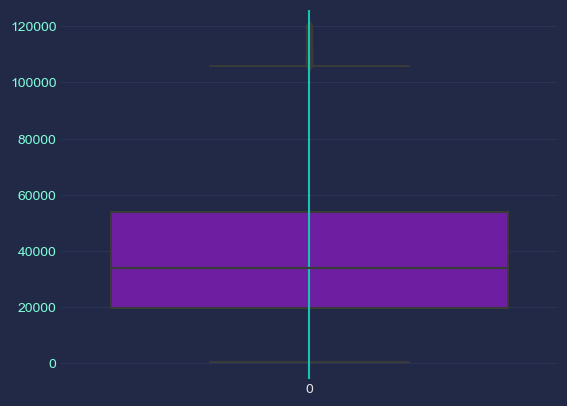

In [31]:
sns.boxplot(df['Income'],color=cyber_punk_colors[7]);
plt.yticks(color=cyber_punk_colors[15]);
plt.axvline(color=cyber_punk_colors[17]);

### Children

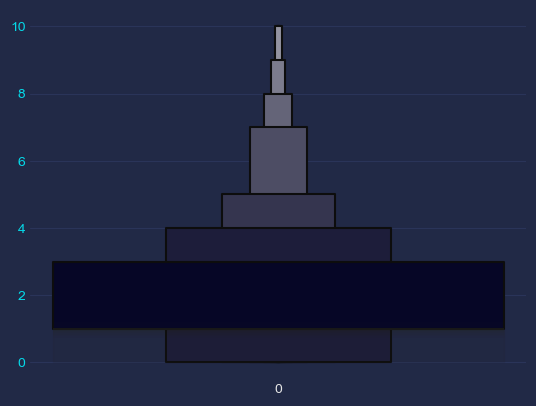

In [32]:
sns.boxenplot(df['Children'],color=cyber_punk_colors[0]);
plt.yticks(color=cyber_punk_colors[2]);
mplcyberpunk.add_glow_effects()

In [33]:
children = df['Children'].value_counts()
children_counts = pd.DataFrame(list(zip(children.index, children.values)),columns=['Children','Count'])
children_counts.style.hide(axis="index")

Children,Count
1,3990
0,1701
3,1015
2,996
4,668
7,139
8,136
6,127
5,115
9,78


In [34]:
df.loc[df['Children'] > 6, 'Children'] = 6

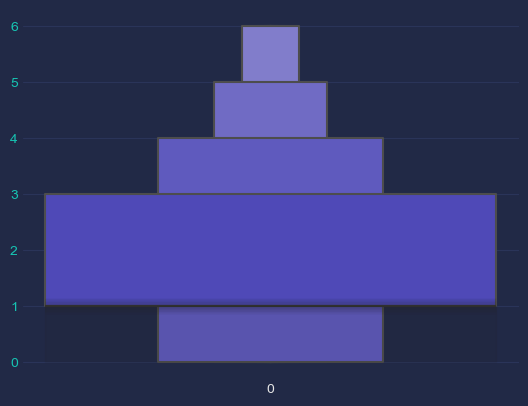

In [35]:
sns.boxenplot(df['Children'],color=cyber_punk_colors[11]);
plt.yticks(color=cyber_punk_colors[17]);
mplcyberpunk.add_glow_effects()

### VitD_levels

For the VitD levels, I took a different approach. Initially, I converted any outlier values to null and interpolated the missing data.

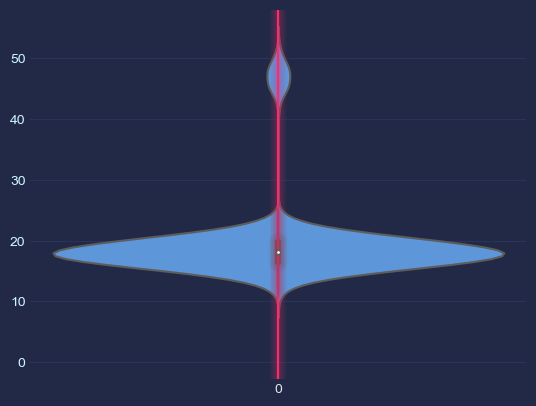

In [36]:
sns.violinplot(df['VitD_levels'],color=cyber_punk_colors[13]);
plt.axvline(color=cyber_punk_colors[4])
plt.yticks(color=cyber_punk_colors[3]);
mplcyberpunk.add_glow_effects()

In [37]:
vdl_stats = pd.DataFrame(df['VitD_levels'].describe())
vdl_stats

,VitD_levels
count,9018.000000
mean,19.415010
std,6.751000
min,9.553535
25%,16.514760
50%,18.070924
75%,19.784931
max,53.019124


In [38]:
df.loc[df['VitD_levels'] > 25.5,'VitD_levels'] = np.nan
df['VitD_levels'].interpolate(method='linear',inplace=True)

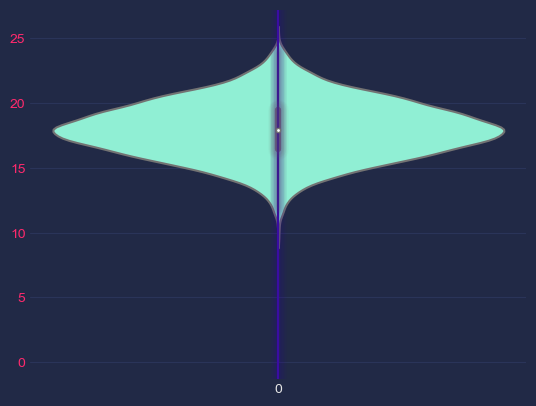

In [39]:
sns.violinplot(df['VitD_levels'],color=cyber_punk_colors[15]);
plt.axvline(color=cyber_punk_colors[10])
plt.yticks(color=cyber_punk_colors[4]);
mplcyberpunk.add_glow_effects()

I used a similar method for TotalCharge. This involved replacing any extreme values with null and filling in any gaps in the data through interpolation.

### TotalCharge

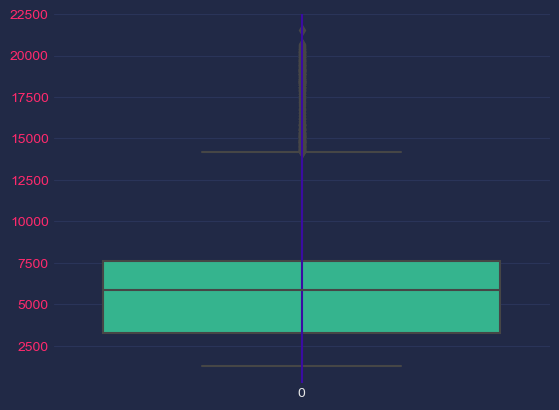

In [40]:
sns.boxplot(df['TotalCharge'],color=cyber_punk_colors[16]);
plt.axvline(color=cyber_punk_colors[10])
plt.yticks(color=cyber_punk_colors[4]);

In [41]:
tc_stats = pd.DataFrame(df['TotalCharge'].describe())
tc_stats

,TotalCharge
count,9018.000000
mean,5891.943489
std,3391.130005
min,1256.750000
25%,3243.185000
50%,5845.620000
75%,7619.805000
max,21524.220000


In [42]:
df.loc[df['TotalCharge'] > 10000,'TotalCharge'] = np.nan
df['TotalCharge'].interpolate(method='linear',inplace=True)

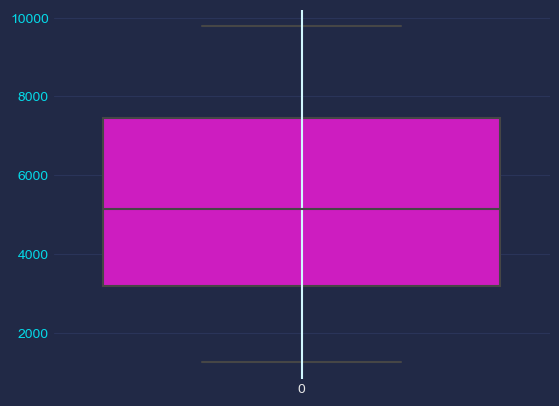

In [43]:
sns.boxplot(df['TotalCharge'],color=cyber_punk_colors[18]);
plt.axvline(color=cyber_punk_colors[3])
plt.yticks(color=cyber_punk_colors[2]);

## Summary of the Outcomes 
To achieve the main objective, I removed irrelevant columns such as Unnamed: 0, UID, CaseOrder, Interaction, and Customer_id from the data. All text columns with “yes” or “no” entries were changed to 1 and 0 respectively. I also renamed survey response columns and converted Age, Children, TotalCharge, Initial_days, and Income into their appropriate numerical format. Missing data in variables like Children, Age, Income, Soft_drink, Overweight Anxiety, and Initial_days were handled using various statistical techniques. Lastly, outliers were detected, and limits were set based on the resulting data.

In [44]:
df.to_csv('cleaned_medical_data.csv',index=False)

##  Limitations and Impact 
The data cleaning process has its limitations. It is a time-consuming task that often takes longer than any other part of the data analysis process. If the analysts are on a tight schedule, they may fail to analyze the data thoroughly, leading to missed anomalies that could skew the results. Cleaning large datasets is challenging and expensive, consuming considerable financial and human resources. If the data is incomplete, missing values or outliers that should be included can lead to missed insights. Data cleaning can also be problematic when attempting to automate due to machine learning issues or tools needing more intelligence to manage missing values or outliers. It is difficult for analysts not part of the organization to clean the data since they cannot meet with leaders to understand the desired outcome of the analysis and the leadership's goals. This can limit the research.

# Data Analysis: Principal Component Analysis (PCA)
Moving on to data analysis, we'll employ Principal Component Analysis (PCA) to gain insights from the cleaned data.

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

To begin my analysis, I will import the cleaned data and extract only the numeric data. Additionally, I will exclude the survey response columns since they are categorical features.

In [46]:
clean_df = pd.read_csv('cleaned_medical_data.csv')
med_data = clean_df.select_dtypes(include=['float'])
med_data['Age'] = clean_df['Age']

## Principal Components
I'll use StandardScaler from the sklearn library to standardize the data, and then perform PCA to create principal components. After, I'll make a scree plot to visualize the eigenvalues.

In [47]:
# Standardize
X = StandardScaler().fit_transform(med_data)
# Create principal components
pca = PCA()
pca.fit(X)
med_pca = pd.DataFrame(pca.transform(X),
columns=[f"PC{i+1}" for i in range(X.shape[1])])           

# Load into dataframe
loadings = pd.DataFrame(pca.components_.T,columns=[f"PC{i+1}" for i in range(X.shape[1])],
index=med_data.columns)
display(loadings)              

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Lat,-0.008247,-0.024112,0.707346,-0.016663,-0.098856,-0.699224,-0.006354,-0.002816
Lng,-0.013274,0.020830,-0.703776,-0.096139,-0.098078,-0.696469,0.012583,-0.000158
Income,-0.042283,0.010895,-0.038494,0.692365,0.702364,-0.154560,-0.006079,-0.000613
VitD_levels,0.046644,0.013705,0.040619,-0.710941,0.696464,-0.041626,-0.008174,0.060733
Initial_days,0.702632,-0.053506,-0.007393,0.073864,-0.032684,-0.013689,-0.022924,0.704382
TotalCharge,0.705180,-0.044933,-0.005705,0.012116,0.027360,-0.014029,0.019683,-0.706534
Additional_charges,0.050827,0.704667,0.031420,0.006563,-0.006243,0.001089,0.706510,0.025193
Age,0.047314,0.705153,0.012460,0.005208,-0.019369,-0.003160,-0.706844,-0.018012


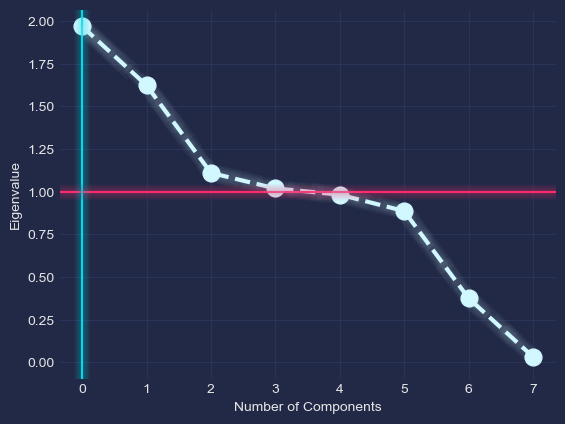

In [48]:
# Calculating eigenvalues
cov_matrix = np.dot(X.T, X) / X.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

# Plotting eigenvalues
# plt.plot(eigenvalues)
plt.plot(eigenvalues,color=cyber_punk_colors[3], marker='o', linestyle='dashed',linewidth=3, markersize=12)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1,color=cyber_punk_colors[4])
plt.axvline(color=cyber_punk_colors[2])
mplcyberpunk.make_lines_glow()
plt.show()

In [49]:
sorted_eigenvalues = sorted(eigenvalues, reverse=True)
eig_df = pd.DataFrame(list(enumerate(sorted_eigenvalues,1)),columns=['Components','Eigenvalues'])
eig_df.style.hide(axis='index')

Components,Eigenvalues
1,1.968836
2,1.623354
3,1.110345
4,1.019015
5,0.983069
6,0.886595
7,0.375891
8,0.032895


The analysis revealed that using more than four components would not be beneficial, as the fourth eigenvalue is the last to exceed one. While two components are sufficient to accurately represent the data, with their eigenvalue significantly exceeding one, technically, the number of principal components is four.

# Conclusion 
Cleaning data plays a pivotal role in maximizing the benefits of reducing hospital readmissions. By meticulously examining and treating specific issues identified in studies, doctors and nurses can significantly enhance patient outcomes. A key step in this process involves determining the most effective approach to address anomalies, such as eliminating problematic data or filling in null values with a mean. Once the dataset undergoes thorough cleaning, analysts gain the power to draw meaningful conclusions and perform diverse analyses, empowering them to tackle pressing business concerns with greater precision and confidence. Principal Component Analysis (PCA) is a valuable technique that complements data cleaning efforts. By employing PCA, analysts can extract the most significant features or patterns from the cleaned data, simplifying its complexity while retaining relevant information. This dimensionality reduction enhances data interpretation, visualization, and subsequent modeling tasks, allowing for efficient storage and processing. Furthermore, PCA aids in noise reduction by separating noise components from the signal. By incorporating PCA into the data cleaning process, healthcare professionals and analysts can further optimize the benefits of reducing hospital readmissions, leading to improved patient care and overall operational efficiency.